#Ali Midhat Abdelgadir Abdalla

#Task :
*coding a classifier to select electron-showers (signal) from hadron-showers (background).*



In [ ]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##1.1

In [ ]:
# reading the calorimeter data
data_path = "/content/drive/MyDrive/calo_shower_data.csv"

df = pd.read_csv(data_path)
df.head()

,shower_depth,shower_width,type
0,102.726547,41.060509,hadron
1,55.953644,19.107106,electron
2,76.237938,21.859595,electron
3,145.829765,18.478401,hadron
4,151.974596,33.539821,hadron


In [ ]:
df.columns

Index(['shower_depth', 'shower_width', 'type'], dtype='object')

*Since our 'target' is to classify wheather the shower is produced by electron or hadron, then "type" column is our target (y)*

##1.2

In [ ]:
# There are 100,000 samples
df.count()

,0
shower_depth,100000
shower_width,100000
type,100000


##2.1


>Without zero-centering, gradient descent suffers from unbalanced and biased updates due to the feature means, leading to slower and inefficient convergence and potential divergence. Scaling and zero-centering normalize the features, ensuring balanced gradients and faster optimization.

##2.2

In [ ]:
# calculating the mean and variance for both input features (shower_depth, shower_width)
MEAN_X1 = df["shower_depth"].mean()
SIGMA_X1 = df["shower_depth"].std()

MEAN_X2 = df["shower_width"].mean()
SIGMA_X2 = df["shower_width"].std()

print(MEAN_X1, MEAN_X2, SIGMA_X1, SIGMA_X2)
# verification of mu and sigma
df.describe()

99.84770284001912 25.0603216349967 31.36051181734425 9.073636171776222


,shower_depth,shower_width
count,100000.000000,100000.000000
mean,99.847703,25.060322
std,31.360512,9.073636
min,0.013479,0.139829
25%,80.005289,18.726105
50%,97.648121,22.890813
75%,121.048161,30.209608
max,222.651768,73.082693


In [ ]:
# Creating new two columns, with scaled values for both X1, X2

df["shower_depth_scaled"] = (df["shower_depth"] - MEAN_X1)/SIGMA_X1
df["shower_width_scaled"] = (df["shower_width"] - MEAN_X2)/SIGMA_X2

# updated dataframe
df.head()

,shower_depth,shower_width,type,shower_depth_scaled,shower_width_scaled
0,102.726547,41.060509,hadron,0.091798,1.763371
1,55.953644,19.107106,electron,-1.399660,-0.656100
2,76.237938,21.859595,electron,-0.752850,-0.352750
3,145.829765,18.478401,hadron,1.466241,-0.725390
4,151.974596,33.539821,hadron,1.662182,0.934520


##3.1, 3.2

$h_\theta(x) = \sum_{j=1}^n x^{(i)}_j \theta_j$

In [ ]:
# to be able to use the above generalized formula,
# we need to create variable x0 with ones values.
df["x0"] = 1
# input features
X = df[["x0", "shower_depth_scaled", "shower_width_scaled"]]
X.describe()

,x0,shower_depth_scaled,shower_width_scaled
count,100000.0,1.000000e+05,1.000000e+05
mean,1.0,3.682743e-16,6.219381e-16
std,0.0,1.000000e+00,1.000000e+00
min,1.0,-3.183437e+00,-2.746473e+00
25%,1.0,-6.327197e-01,-6.980902e-01
50%,1.0,-7.013857e-02,-2.391003e-01
75%,1.0,6.760240e-01,5.674998e-01
max,1.0,3.915882e+00,5.292517e+00


##3.3

In [ ]:
# created a target column, whereve the type is electron we have y=1, else it is 0
df["y"] = 0
df.loc[df["type"]=="electron", "y"] = 1
df.head()

,shower_depth,shower_width,type,shower_depth_scaled,shower_width_scaled,x0,y
0,102.726547,41.060509,hadron,0.091798,1.763371,1,0
1,55.953644,19.107106,electron,-1.399660,-0.656100,1,1
2,76.237938,21.859595,electron,-0.752850,-0.352750,1,1
3,145.829765,18.478401,hadron,1.466241,-0.725390,1,0
4,151.974596,33.539821,hadron,1.662182,0.934520,1,0


##3.4

In [ ]:
y = df["y"]

##4.1

In [ ]:
from sklearn.model_selection import train_test_split

X_train_df, X_test_df, y_train_df, y_test_df = train_test_split( X, y, test_size=0.2, random_state=42)

X_train = X_train_df.to_numpy() ; y_train = y_train_df.to_numpy()
X_test  = X_test_df.to_numpy()  ; y_test  = y_test_df.to_numpy()
print(f"X_train shape {X_train.shape}\t y_train shape {y_train.shape}\nX_test shape {X_test.shape}\t y_test shape {y_test.shape}")

X_train shape (80000, 3)	 y_train shape (80000,)
X_test shape (20000, 3)	 y_test shape (20000,)


##4.2

* *Test size represent the number of pairs we left with after slicing the input features and target with a test_ratio (slice) of 0.2*
* *We had 100,000 datapoints, but after splitting the data we have a training size of 80,000 points and test size of 20,000 points*

##5.1, 5.2, 5.3, 5.4, 5.5

In [ ]:
# linear summation (z)
def lin_sum(X, thetas):
  return np.dot(X, thetas)

def sigmoid(z):
    return 1/(1+ np.exp(-z))
# hypothesis function h(z)
def h_class(X, thetas):
    return sigmoid(lin_sum(X, thetas))

def cross_entropy_cost(y_vals, y_preds):
    return -np.sum(y_vals*np.log(y_preds) + (1-y_vals)*np.log(1-y_preds))/len(y_vals)

def derivatives_cross_entropy(y_preds, y_obs, x_feature):
    return x_feature.T.dot(y_preds - y_obs) / len(y_obs)


##6.1

In [ ]:
# Learning rate
alpha = 0.05
# Number of iterations
N = 1000
# Number of featuers
n = 3

# Initializing thetas from a random normal distribution
thetas = np.random.randn(n).reshape(-1,1) # reshape to a vector of size (3,1)

# log for both test and train costs (J)
costs_train = []
costs_test = []

for i in range(1, N+1):
  # train
  y_preds = h_class(X_train, thetas)
  J_train = cross_entropy_cost(y_train, y_preds);costs_train.append(J_train)
  # test
  y_preds_test = h_class(X_test, thetas)
  J_test = cross_entropy_cost(y_test, y_preds_test); costs_test.append(J_test)

  #
  dJ_thetas = np.zeros(shape=(3,1))
  dJ_thetas = derivatives_cross_entropy(y_preds, y_train, X_train)
  thetas = thetas - alpha * dJ_thetas
  if (i<100 and i % 10 == 0) or (i>100 and i % 100 == 0):
    print('[%d]\tt0 = %4.4f  t1 = %4.4f  t2 = %4.4f  Cost = %4.4f  dJ0 = %4.4f  dJ1 = %4.4f  dJ2 = %4.4f' %
         ( i,   thetas[0,0], thetas[1,0], thetas[2,0],   J_train,  dJ_thetas[0,0],   dJ_thetas[1,0],   dJ_thetas[2,0]))


[10]	t0 = -0.7891  t1 = 0.6331  t2 = -1.6595  Cost = 0.7238  dJ0 = -0.1276  dJ1 = 0.3427  dJ2 = 0.0720
[20]	t0 = -0.7294  t1 = 0.4701  t2 = -1.6911  Cost = 0.6606  dJ0 = -0.1126  dJ1 = 0.3125  dJ2 = 0.0566
[30]	t0 = -0.6770  t1 = 0.3217  t2 = -1.7158  Cost = 0.6090  dJ0 = -0.0986  dJ1 = 0.2841  dJ2 = 0.0437
[40]	t0 = -0.6313  t1 = 0.1869  t2 = -1.7347  Cost = 0.5671  dJ0 = -0.0859  dJ1 = 0.2581  dJ2 = 0.0331
[50]	t0 = -0.5915  t1 = 0.0644  t2 = -1.7487  Cost = 0.5329  dJ0 = -0.0747  dJ1 = 0.2349  dJ2 = 0.0245
[60]	t0 = -0.5569  t1 = -0.0473  t2 = -1.7590  Cost = 0.5049  dJ0 = -0.0650  dJ1 = 0.2145  dJ2 = 0.0175
[70]	t0 = -0.5267  t1 = -0.1495  t2 = -1.7662  Cost = 0.4818  dJ0 = -0.0567  dJ1 = 0.1965  dJ2 = 0.0120
[80]	t0 = -0.5003  t1 = -0.2434  t2 = -1.7709  Cost = 0.4624  dJ0 = -0.0496  dJ1 = 0.1809  dJ2 = 0.0076
[90]	t0 = -0.4772  t1 = -0.3301  t2 = -1.7737  Cost = 0.4461  dJ0 = -0.0436  dJ1 = 0.1673  dJ2 = 0.0041
[200]	t0 = -0.3421  t1 = -0.9877  t2 = -1.7494  Cost = 0.3601  dJ0 = 

In [ ]:
print('Optimized thetas:')
print(f'Theta 0 = {thetas[0,0]:.4f}, Theta 1 = {thetas[1,0]:.4f}, Theta 2 = {thetas[2,0]:.4f}')

Optimized thetas:
Theta 0 = -0.2739, Theta 1 = -2.2405, Theta 2 = -1.6677


##7.1,7.2

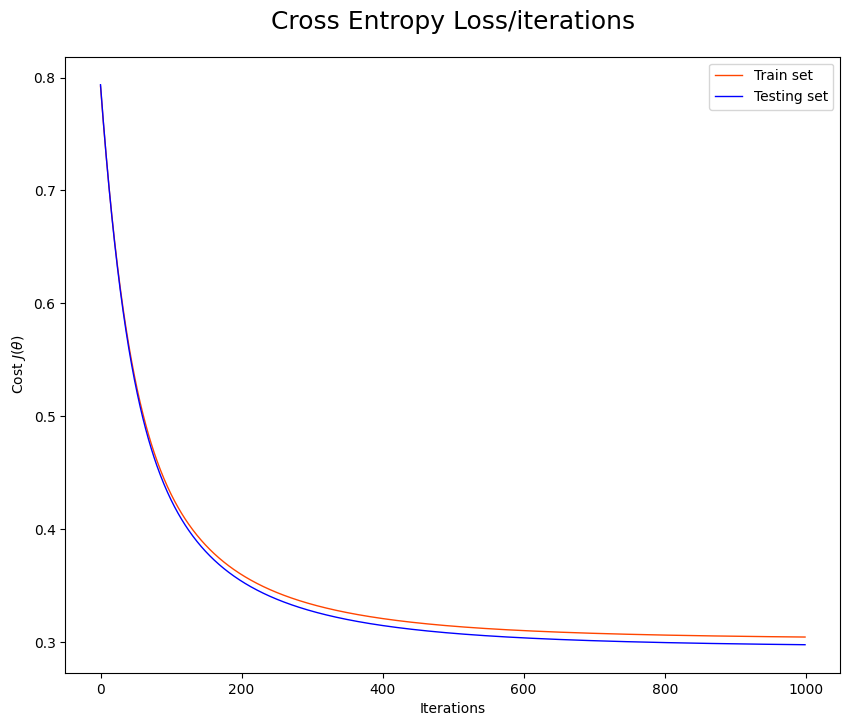

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(np.arange(N), costs_train, color="orangered", label="Train set", lw=1)
plt.plot(np.arange(N), costs_test, color="blue", label="Testing set", lw=1)
plt.xlabel("Iterations")
plt.ylabel(r"Cost $J(\theta)$")
plt.title("Cross Entropy Loss/iterations",fontsize=18, pad=20)
plt.legend()

##7.1,7.2

>*7.1: The cost $J(\theta)$, is monotonically decreasing with each iteration, and we can see the steepiest decrease between the (0~200) iterations, also we observe that there is small gap between the training and testing sets, which indicates the model didn't overfit. Major difference between those two is the testing tends to have smaller cost values at the end unlike training set which is slightly highere, but both eventually converge*

>*7.2: Overfitting*

##8

In [ ]:
def make_predictions(thetas, X, y, boundary=0.5):

  bin_preds = [1 if value > boundary else 0 for value in h_class(X, np.array(thetas))[:,0] ]

  return bin_preds
preds = make_predictions(thetas, X_test, y_test, 0.5)
# Turn y_test into 1D array:
obs_test = y_test[:,0]



[1, 0, 1, 0, 1, 0, 0, 0, 0, 0]

##8.1

In [ ]:
def get_accuracy(obs_values, pred_values):
    correct_predictions = np.sum([1 if pred==obs_values[i] else 0 for i,pred in enumerate(pred_values)])
    acc = correct_predictions / len(pred_values)  # correct_predictions / over_all_predictions
    return acc
print("Accuracy = ",get_accuracy(obs_test, preds))
# the same thing but with less lines of codes
print("Accuracy =",np.mean(obs_test==preds))

Accuracy =  0.88195
Accuracy = 0.88195


##8.2

In [ ]:
def get_recall(obs_values, pred_values):
    TP = np.sum([1 if (pred==1 and obs_values[i]==1) else 0 for i,pred in enumerate(pred_values)])
    FN = np.sum([1 if (obs_values[i]==1 and pred==0) else 0 for i,pred in enumerate(pred_values)])
    recall = TP/(TP+FN)
    return recall
print("Recall = ",get_recall(obs_test, preds)  )

Recall =  0.910323358104037


##BONUS: DB

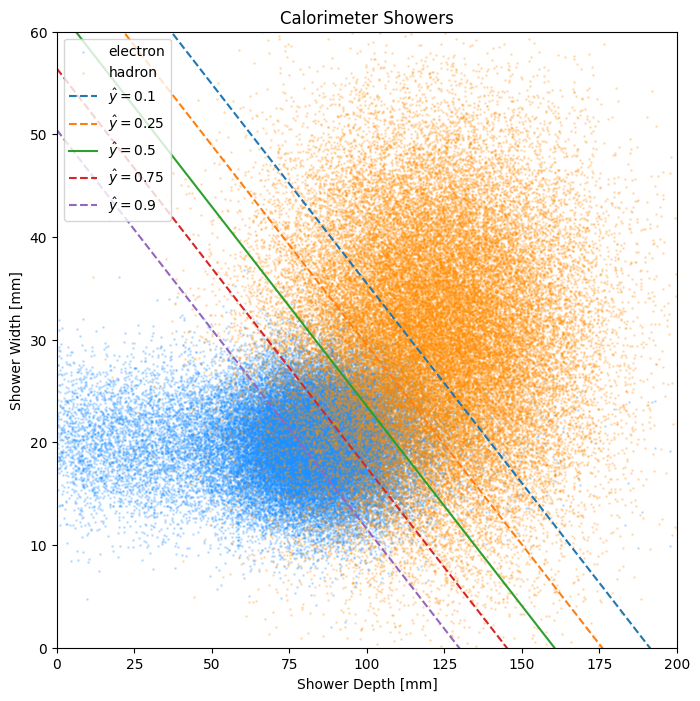

In [ ]:
all_signals = df[df["type"]=="electron"][["shower_depth", "shower_width"]]
all_backgrounds = df[df["type"]=="hadron"][["shower_depth", "shower_width"]]

sigs = all_signals.to_numpy()
bkgs = all_backgrounds.to_numpy()

def rev_sigmoid(y):
  return np.log(y/(1-y))

def scale_inputs(input_feature, mu, sigma):
  return (input_feature - mu)/sigma
def unscale_inputs(scaled_feature, mu, sigma):
  return scaled_feature * sigma + mu



def get_boundary_line_x2(sigs, bkgs, thresholds, thetas, x1_min=0,
                         x1_max=200, x2_min=0, x2_max=60, mu_d = MEAN_X1, sigma_d=SIGMA_X1, mu_w = MEAN_X2, sigma_w = SIGMA_X2):

    if thresholds is None: # default threshold value
        thresholds = [0.5]

    theta0, theta1, theta2 = thetas

    fig, ax = plt.subplots(figsize=(8,8))

    ax.scatter(sigs[:,0], sigs[:,1], alpha=0.2, s=1, color="dodgerblue", label="electron")
    ax.scatter(bkgs[:,0], bkgs[:,1],alpha=0.2, s=1, color="darkorange", label="hadron")

    ax.set_xlim([x1_min, x1_max])
    ax.set_ylim([x2_min, x2_max])
    ax.set_xlabel("Shower Depth [mm]")
    ax.set_ylabel("Shower Width [mm]")
    ax.set_title("Calorimeter Showers")


    for t in thresholds:
        boundary_val = rev_sigmoid(t)


        x1_left_scaled = scale_inputs(x1_min, mu_d, sigma_d)
        x1_right_scaled = scale_inputs(x1_max, mu_d, sigma_d)


        x2_left_scaled = (boundary_val - theta0 - theta1 * x1_left_scaled) / theta2
        x2_right_scaled = (boundary_val - theta0 - theta1 * x1_right_scaled) / theta2

        x2_left_unscaled = unscale_inputs(x2_left_scaled, mu_w, sigma_w)
        x2_right_unscaled = unscale_inputs(x2_right_scaled, mu_w, sigma_w)

        if t == 0.5:
            ax.plot([x1_min, x1_max],[x2_left_unscaled, x2_right_unscaled],label=f"$\\hat{{y}}={t}$", ls="-")
        else :

            ax.plot([x1_min, x1_max],[x2_left_unscaled, x2_right_unscaled],label=f"$\\hat{{y}}={t}$", ls="--")
    ax.legend()

# best thetas (t0 = -0.2739, t1 = -2.2405, t3 = -1.6677)

thetas = [-0.2739, -2.2405, -1.6677]
thresholds = [0.10, 0.25, 0.5, 0.75, 0.90]
get_boundary_line_x2(sigs, bkgs, thresholds, thetas)

>Because a higher threshold requires a higher predicted probability $\hat y$ for classifying a point as an electron (positive class) ,which leads to less points classified as 1 'positive'.

>